In [1]:
import sounddevice as sd
import soundfile as sf
import yin as YIN
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fs = 48000
channels = 1
recording = sd.rec(5*fs, fs, channels)
sd.wait()

/home/lucas/Electronics/ITBA/Voice Processing/VoiceProcessingProject/src/yin.py:45: RuntimeWarning: invalid value encountered in true_divide
  cmndf = df[1:] * range(1, len(df)) / np.cumsum(df[1:]).astype(float) #scipy method


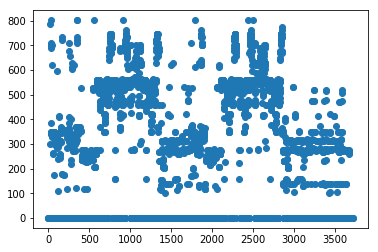

In [3]:
hol = sf.read('Chand.wav')
fs = hol[1]
recording = np.array(hol[0][:,0]).reshape(-1)
#recording = np.load("Test.npy")
obj = YIN.Yin()
pred = obj.yin(recording, fs, w_len=5120, w_step=2560, f0_min=100, f0_max=800, harmo_thresh=0.4)
plt.plot(pred[0],'o')

In [4]:
from bisect import bisect_left

def get_grid(val):
    for element in np.array(val):
        if(element > 100):
            main = element
            break
    tones = [main]
    exp = 0
    while tones[0] > 100:
        exp -= 1
        tones.insert(0, main*2**(exp/12))
    exp = 0
    while tones[-1] < 800:
        exp += 1
        tones.append(main*2**(exp/12))
    return tones

def takeClosest(myList, myNumber):
    """
    Assumes myList is sorted. Returns closest value to myNumber.

    If two numbers are equally close, return the smallest number.
    """
    pos = bisect_left(myList, myNumber)
    if pos == 0:
        return myList[0]
    if pos == len(myList):
        return myList[-1]
    before = myList[pos - 1]
    after = myList[pos]
    if after - myNumber < myNumber - before:
        return after
    else:
        return before

def cast_to_grid(val):
    quantized = [takeClosest(get_grid(val),a) for a in val]
    return quantized
    
def medianize(arr, size):
    ret = []
    for ind,val in enumerate(arr):
        ret.append(np.median(arr[ind:ind+size]))
    return ret
        
    

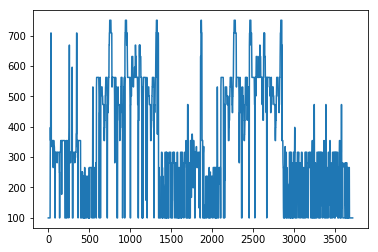

In [188]:
u = cast_to_grid(pred[0])
uu = medianize(u, 5)
plt.plot(uu)

In [15]:
test = []
for element in pred[0][500:1000]:
    test.extend(np.hanning(2560)*np.sin(np.pi*2*2*element*np.arange(2560)/fs))

from scipy import signal
def recover(x, nm):
    b, a = signal.butter(2, nm, 'low')
    z = signal.filtfilt(b, a, x)
    return z

test = recover(test, 0.05)

/home/lucas/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [17]:
sd.play(test, fs)
sd.wait()

<sounddevice.CallbackFlags: output underflow>

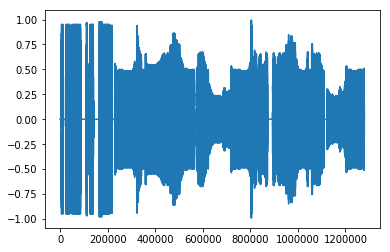

In [16]:
plt.plot(test)

In [9]:
fs

44100